In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
heart  = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
print(heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/macbook/opt/a

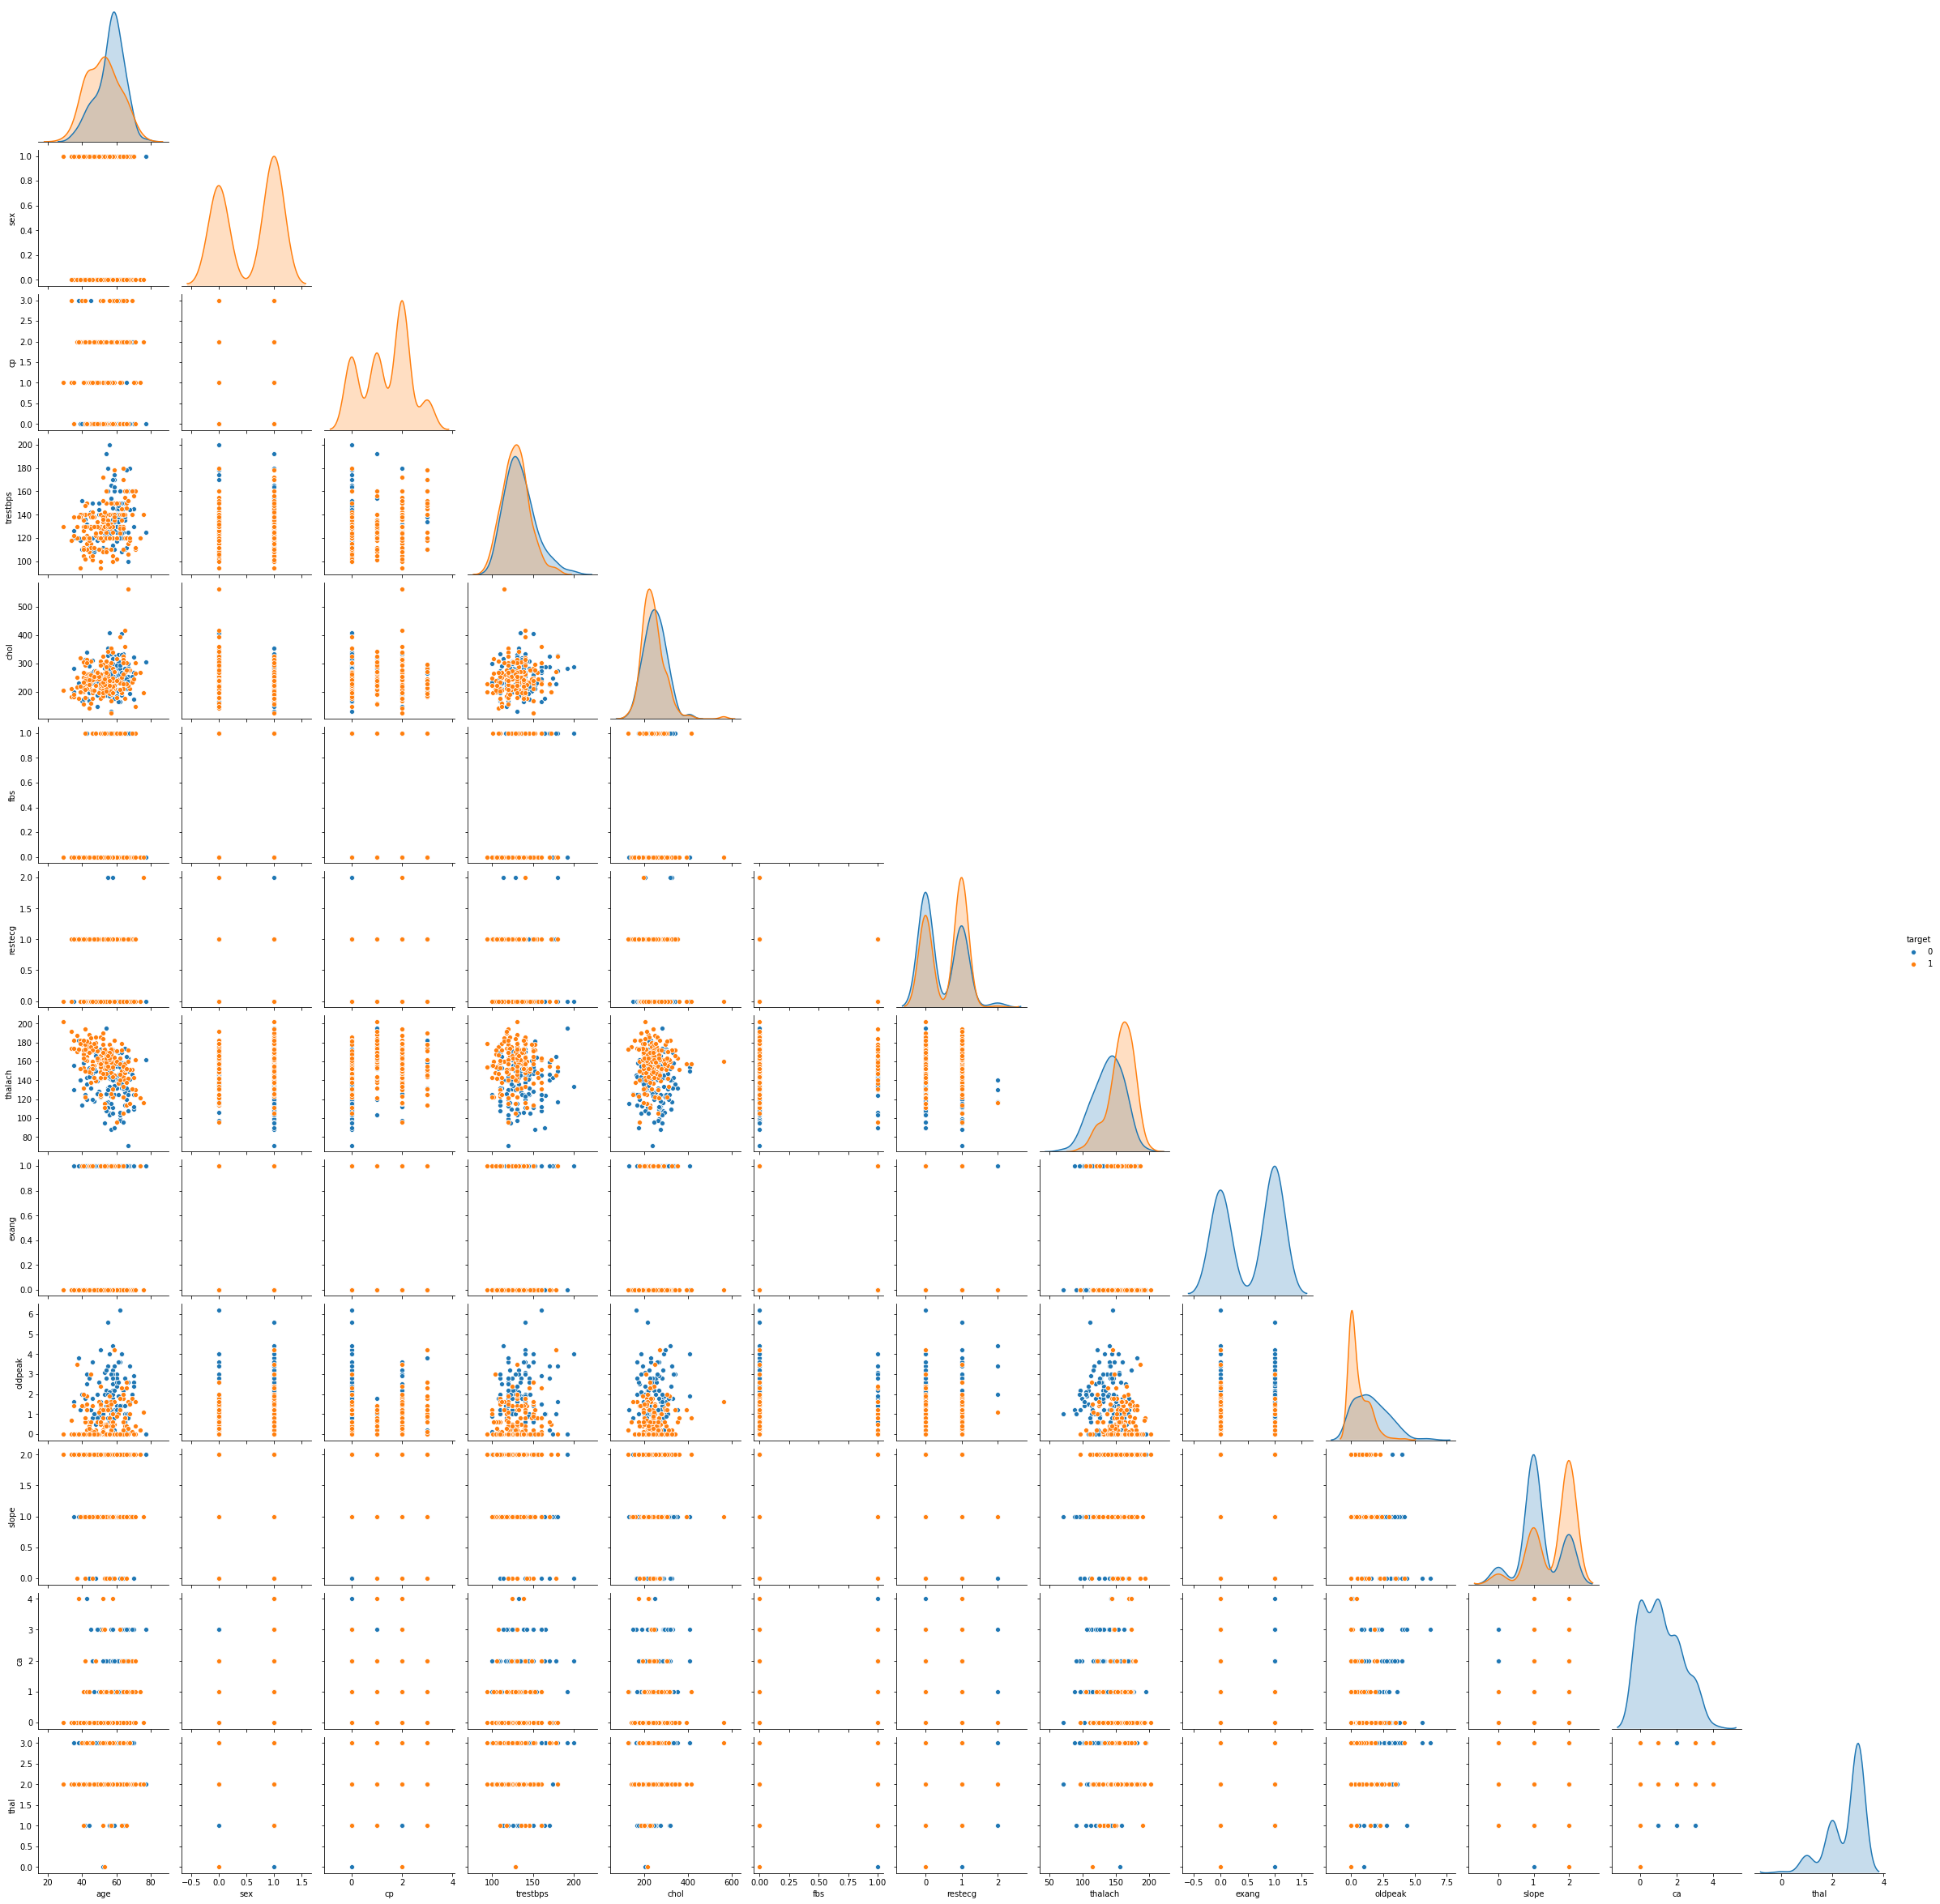

In [30]:
sns.pairplot(heart, corner= True, hue = 'target')
plt.show()

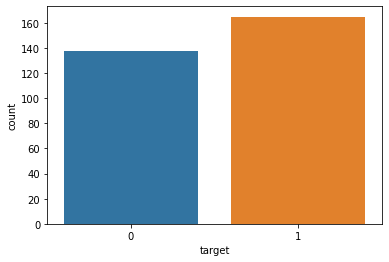

In [31]:
sns.countplot(heart['target'])
plt.show()

# Train Test Split/ Decision Tree

In [6]:
x = heart.drop("target", axis=1)
y = heart['target']

from sklearn.model_selection import train_test_split
x_train, x_test, train_lables, test_lables = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier

heart_model1  = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
heart_model1.fit(x_train, train_lables)

from sklearn import tree

label = ['No', 'Yes']
heart_tree_file = open('heart.dot', 'w')
dot_file = tree.export_graphviz(heart_model1, out_file= heart_tree_file, feature_names= list(x_train),
    class_names= list(label))
heart_tree_file.close()

In [8]:
rf = RandomForestClassifier(n_estimators = 100 , oob_score = True, random_state= 100, max_features = 4)
rf.fit(x, y)
rf.oob_score_

0.8184818481848185

In [139]:
df = pd.DataFrame(columns = ['OOB_score', 'n_estimators', 'max_feature'])
df

,OOB_score,n_estimators,max_feature


In [140]:
max_feature = [None, 'sqrt', 6]
n_tree = np.linspace(100, 500, 100)
for n_col in max_feature:
    for i in n_tree:
        rfcl = RandomForestClassifier(n_estimators = int(i) , oob_score = True, random_state= 100, max_features = n_col)
        rfcl.fit(x_train, train_lables)
        df.loc[len(df)] = [rfcl.oob_score_, i, n_col]

In [145]:
df.fillna('None', inplace = True)
df.sort_values(by='OOB_score', ascending=False)

,OOB_score,n_estimators,max_feature
196,0.834906,487.878788,sqrt
188,0.834906,455.555556,sqrt
101,0.834906,104.040404,sqrt
171,0.834906,386.868687,sqrt
173,0.834906,394.949495,sqrt
...,...,...,...
12,0.778302,148.484848,None
32,0.778302,229.292929,None
8,0.778302,132.323232,None
16,0.773585,164.646465,None


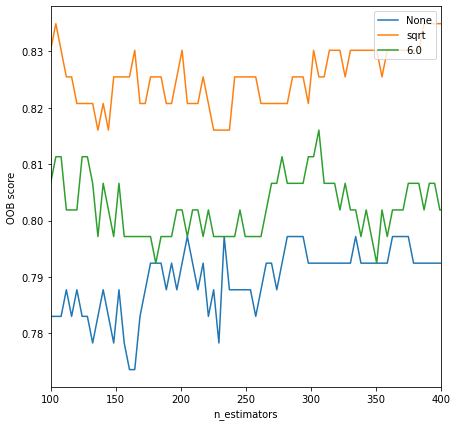

In [148]:
df2 = df['max_feature'].unique()
plt.figure(figsize=(7,7))

for i in df2:
    df_new  = df[df.max_feature == i]
    col = df_new['OOB_score']
    row = df_new['n_estimators']
    plt.plot(row, col, label = i)
    
plt.xlim(100, 400)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.legend(loc="upper right")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [20, 50],
    'min_samples_split': [100, 150],
    'n_estimators': [104, 108, 110]
}

rfcl2 = RandomForestClassifier(oob_score = True, random_state= 100)

grid_search = GridSearchCV(estimator = rfcl2, param_grid = param_grid, cv = 3)

grid_search.fit(x_train, train_lables)
grid_search.best_params_
best_grid = grid_search.best_estimator_

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [10]:
best_grid.oob_score_

0.8207547169811321

In [16]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'n_estimators': 104}

In [34]:
pd.DataFrame({'Feature_Imp.' :best_grid.feature_importances_} , index = x_train.columns)

,Feature_Imp.
age,0.000000
sex,0.065724
cp,0.205224
trestbps,0.009615
chol,0.003334
fbs,0.000000
restecg,0.009615
thalach,0.081724
exang,0.134615
oldpeak,0.104344


In [21]:
from sklearn.model_selection import cross_val_score
clf = grid_search.fit(x_train, train_lables)
scores = cross_val_score(clf, x_train, train_lables, cv=5)
scores

array([0.76744186, 0.86046512, 0.88095238, 0.73809524, 0.85714286])

AUC: 0.932


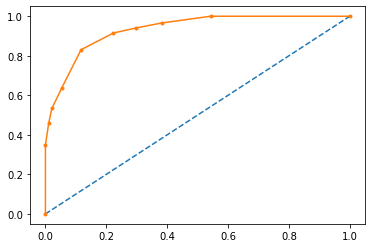

In [22]:

# AUC and ROC for the training data

# predict probabilities
probs = heart_model1.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_lables, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_lables, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_lables,ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        44
           1       0.77      0.94      0.85        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91

